In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np

In [4]:
fname = "lbrprices_transformed_v2.csv"
prices = pd.read_csv(fname, index_col="Fecha_hora").dropna()
prices.head(5)

P    Ph-24    Ph-25    Ph-26    Ph-27    Ph-28  \
Fecha_hora                                                                  
2016-08-09 00:00:00  95.3264  54.8461  45.1982  44.7123  46.2995  42.9422   
2016-08-09 01:00:00  82.8532  52.2179  54.8461  45.1982  44.7123  46.2995   
2016-08-09 02:00:00  57.9764  61.9198  52.2179  54.8461  45.1982  44.7123   
2016-08-09 03:00:00  67.6407  36.8105  61.9198  52.2179  54.8461  45.1982   
2016-08-09 04:00:00  66.4892  34.8274  36.8105  61.9198  52.2179  54.8461   

                       Ph-29    Ph-30    Ph-31    Ph-32    ...      month_Dec  \
Fecha_hora                                                 ...                  
2016-08-09 00:00:00  44.3551  46.3440  45.6826  42.6676    ...              0   
2016-08-09 01:00:00  42.9422  44.3551  46.3440  45.6826    ...              0   
2016-08-09 02:00:00  46.2995  42.9422  44.3551  46.3440    ...              0   
2016-08-09 03:00:00  44.7123  46.2995  42.9422  44.3551    ...              0   
2016-08-09 04:00:00  45.1982  44.7123  46.2995  42.9422    ...              0   

                     month_Feb  month_Jan  month_Jul  month_Jun  month_Mar  \
Fecha_hora                                                                   
2016-08-09 00:00:00          0          0          0          0          0   
2016-08-09 01:00:00          0          0          0          0          0   
2016-08-09 02:00:00          0          0          0          0          0   
2016-08-09 03:00:00          0          0          0          0          0   
2016-08-09 04:00:00          0          0          0          0          0   

                     month_May  month_Nov  month_Oct  month_Sep  
Fecha_hora                                                       
2016-08-09 00:00:00          0          0          0          0  
2016-08-09 01:00:00          0          0          0          0  
2016-08-09 02:00:00          0          0          0          0  
2016-08-09 03:00:00          0          0          0          0  
2016-08-09 04:00:00          0          0          0          0  

[5 rows x 94 columns]

In [5]:
prices.describe(include=['object', 'int', 'float'])

P         Ph-24         Ph-25         Ph-26         Ph-27  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean      72.093873     72.053371     72.051262     72.048388     72.043583   
std       34.183615     34.176714     34.177036     34.176854     34.173544   
min       18.704900     18.704900     18.704900     18.704900     18.704900   
25%       48.164400     48.156475     48.154175     48.152250     48.147300   
50%       65.084300     65.010100     65.008500     65.007250     65.002250   
75%       88.620925     88.541800     88.541800     88.531450     88.526450   
max      329.440000    329.440000    329.440000    329.440000    329.440000   

              Ph-28         Ph-29         Ph-30         Ph-31         Ph-32  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean      72.039969     72.035831     72.032904     72.029738     72.025476   
std       34.172700     34.170911     34.170539     34.169971     34.168179   
min       18.704900     18.704900     18.704900     18.704900     18.704900   
25%       48.145375     48.140500     48.134600     48.132500     48.130500   
50%       64.996600     64.995100     64.993600     64.989550     64.985950   
75%       88.521425     88.517825     88.516725     88.513675     88.496425   
max      329.440000    329.440000    329.440000    329.440000    329.440000   

           ...          month_Dec     month_Feb     month_Jan     month_Jul  \
count      ...       20520.000000  20520.000000  20520.000000  20520.000000   
mean       ...           0.085380      0.065497      0.072515      0.072515   
std        ...           0.279453      0.247407      0.259344      0.259344   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

          month_Jun     month_Mar     month_May     month_Nov     month_Oct  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean       0.070175      0.072515      0.072515      0.105263      0.108772   
std        0.255449      0.259344      0.259344      0.306900      0.311360   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          month_Sep  
count  20520.000000  
mean       0.105263  
std        0.306900  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 94 columns]

### Choosing features and targe

In [6]:
X = prices.drop(["P"], axis=1)
y = prices["P"]

In [7]:
y.head(5)

Fecha_hora
2016-08-09 00:00:00    95.3264
2016-08-09 01:00:00    82.8532
2016-08-09 02:00:00    57.9764
2016-08-09 03:00:00    67.6407
2016-08-09 04:00:00    66.4892
Name: P, dtype: float64

In [8]:
X.head(5)

Ph-24    Ph-25    Ph-26    Ph-27    Ph-28    Ph-29  \
Fecha_hora                                                                  
2016-08-09 00:00:00  54.8461  45.1982  44.7123  46.2995  42.9422  44.3551   
2016-08-09 01:00:00  52.2179  54.8461  45.1982  44.7123  46.2995  42.9422   
2016-08-09 02:00:00  61.9198  52.2179  54.8461  45.1982  44.7123  46.2995   
2016-08-09 03:00:00  36.8105  61.9198  52.2179  54.8461  45.1982  44.7123   
2016-08-09 04:00:00  34.8274  36.8105  61.9198  52.2179  54.8461  45.1982   

                       Ph-30    Ph-31    Ph-32    Ph-33    ...      month_Dec  \
Fecha_hora                                                 ...                  
2016-08-09 00:00:00  46.3440  45.6826  42.6676  39.0872    ...              0   
2016-08-09 01:00:00  44.3551  46.3440  45.6826  42.6676    ...              0   
2016-08-09 02:00:00  42.9422  44.3551  46.3440  45.6826    ...              0   
2016-08-09 03:00:00  46.2995  42.9422  44.3551  46.3440    ...              0   
2016-08-09 04:00:00  44.7123  46.2995  42.9422  44.3551    ...              0   

                     month_Feb  month_Jan  month_Jul  month_Jun  month_Mar  \
Fecha_hora                                                                   
2016-08-09 00:00:00          0          0          0          0          0   
2016-08-09 01:00:00          0          0          0          0          0   
2016-08-09 02:00:00          0          0          0          0          0   
2016-08-09 03:00:00          0          0          0          0          0   
2016-08-09 04:00:00          0          0          0          0          0   

                     month_May  month_Nov  month_Oct  month_Sep  
Fecha_hora                                                       
2016-08-09 00:00:00          0          0          0          0  
2016-08-09 01:00:00          0          0          0          0  
2016-08-09 02:00:00          0          0          0          0  
2016-08-09 03:00:00          0          0          0          0  
2016-08-09 04:00:00          0          0          0          0  

[5 rows x 93 columns]

### Train/test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
print("Training features/target: ", X_train.shape, y_train.shape)
print("Testing freatures/targe: ", X_test.shape, y_test.shape)

Training features/target:  (15390, 93) (15390,)
Testing freatures/targe:  (5130, 93) (5130,)


### Scalaling Features

In [10]:
y_train = y_train.values.reshape(-1 ,1)
y_test = y_test.values.reshape(-1 , 1)

## Cross-Validation and Hyper-parameters | Decision Tree Regressor

In [11]:
# Import Pipeline and GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [12]:
pipe = Pipeline([
    ('standarscaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=8))
])

In [23]:
hyperparameters = {'regressor__max_depth': range(3,16)}

rgs = GridSearchCV(pipe, hyperparameters, cv=5, scoring='r2', verbose=5)
rgs.fit(X_train, y_train)
rgs.score(X_test, y_test)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] regressor__max_depth=3 ..........................................
[CV] . regressor__max_depth=3, score=0.5169398553533737, total=   0.4s
[CV] regressor__max_depth=3 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] . regressor__max_depth=3, score=0.5292431314738588, total=   0.4s
[CV] regressor__max_depth=3 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] . regressor__max_depth=3, score=0.5271596622666745, total=   0.4s
[CV] regressor__max_depth=3 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] . regressor__max_depth=3, score=0.5189516721105789, total=   0.4s
[CV] regressor__max_depth=3 ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV] . regressor__max_depth=3, score=0.5328275859007272, total=   0.4s
[CV] regressor__max_depth=4 ..........................................
[CV] . regressor__max_depth=4, score=0.5569892983602978, total=   0.5s
[CV] regressor__max_depth=4 ..........................................
[CV] . regressor__max_depth=4, score=0.5718718945800592, total=   0.5s
[CV] regressor__max_depth=4 ..........................................
[CV] . regressor__max_depth=4, score=0.5705645799913583, total=   0.5s
[CV] regressor__max_depth=4 ..........................................
[CV] . regressor__max_depth=4, score=0.5683469295684258, total=   0.5s
[CV] regressor__max_depth=4 ..........................................
[CV] . regressor__max_depth=4, score=0.5634864084931571, total=   0.5s
[CV] regressor__max_depth=5 ..........................................
[CV] . regressor__max_depth=5, score=0.5755784603496508, total=   0.6s
[CV] regressor__max_depth=5 ..........................................
[CV] .

[CV]  regressor__max_depth=15, score=0.5544623006601073, total=   1.2s
[CV] regressor__max_depth=15 .........................................
[CV]  regressor__max_depth=15, score=0.5787527037563012, total=   1.2s
[CV] regressor__max_depth=15 .........................................
[CV] . regressor__max_depth=15, score=0.591278105782729, total=   1.2s


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.0min finished


0.65082387928641783

In [24]:
rgs.score(X_test, y_test)

0.65082387928641783

In [25]:
rgs.best_params_

{'regressor__max_depth': 7}

In [26]:
y_pred = rgs.predict(X_test)

In [18]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


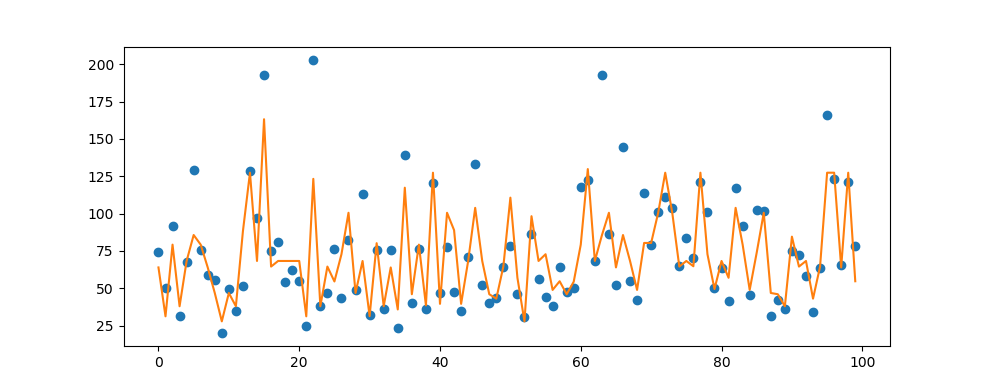

In [27]:
plt.plot(y_test[2000:2100], 'o')
plt.plot(y_pred[2000:2100])
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(np.sqrt(mse)))

MAE: 13.167079913226685
MSE: 399.0933987393499
RMSE: 19.97732211131787


## Cross-Validation and Hyper-parameters | Support Vector Regressor

In [34]:
from sklearn.svm import SVR, LinearSVR, NuSVR
svr_pipe = Pipeline([
    ('standarscaler', StandardScaler()),
    ('regressor', SVR())
])




In [42]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'sigmoid']

In [ ]:
hyperparameters = {'regressor__C': Cs,
                   'regressor__gamma': gammas,
                   'regressor__kernel': kernels
                  }

rgs_svr = GridSearchCV(svr_pipe, hyperparameters, cv=5, verbose=5)
rgs_svr.fit(X_train, y_train.ravel())
rgs_svr.score(X_test, y_test.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear 
[CV]  regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear, score=0.5221868310469786, total= 1.6min
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear, score=0.5603189593930469, total=  29.1s
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s


[CV]  regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear, score=0.5752481382471257, total=  26.7s
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.5min remaining:    0.0s


[CV]  regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear, score=0.5388081220039732, total=  27.0s
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.3min remaining:    0.0s


[CV]  regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=linear, score=0.5315933240996253, total=  29.1s
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=rbf 
[CV]  regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=rbf, score=-0.027056272641825085, total=  34.5s
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=rbf 
[CV]  regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=rbf, score=-0.03026266031967384, total=  37.5s
[CV] regressor__C=0.001, regressor__gamma=0.001, regressor__kernel=rbf 


In [41]:
y_train.ravel().shape

(15390,)